
#Resolvendo QM utilzando Python

Conteúdo adaptado de https://github.com/DalInar/schrodingers-snake.git

<p>O oscilador hârmonico é um dos problemas fundamentais na Química Quântica. A equação de Shrodinger que descreve esse sistema dado potencial "massa-mola".<p>

$$
-\frac{\hbar^2}{2 m} \frac{d^2 \psi}{d x^2}+\frac{1}{2} m \omega^2 x^2 \psi=E \psi
$$

A solução dessa equação de auto-valor, auto-vetor é:

$$\psi_n(x) = \frac{1}{\sqrt{2^nn!}}\left( \frac{m\omega}{\pi \hbar} \right)^{1/4}e^{-\frac{m\omega x^2}{2\hbar}}H_n\left(\sqrt{ \frac{m \omega}{\hbar}}x \right)$$
$$E_n=\hbar \omega \left( n+\frac{1}{2}\right) $$

##Exercício

1. Usando a biblioteca numpy e a biblioteca mathplotlib, gere gráficos para a função de onda e densidade probabilidade para n=1,2 e 3. Além disso, mostre as energias associadas a esses autoestados.

<p>NumPy é uma biblioteca fundamental para a computação científica em Python. É uma biblioteca Python que fornece um objeto de matriz multidimensional, vários objetos derivados e um conjunto de rotinas para operações rápidas em matrizes, incluindo operações matemáticas, lógicas, manipulação de formas, ordenação, seleção, E/S, transformadas discretas de Fourier, álgebra linear básica, operações estatísticas básicas e muito mais.<p>

<p>Use a Numpy para importar os polinômios de Hermite, cuja forma segue padrão abaixo, e realizar as operações matemáticas necessárias<p>

$$
p(x)=c_0 * H_0(x)+c_1 * H_1(x)+\ldots+c_n * H_n(x)
$$





In [5]:
# Importa o backend do Matplotlib que permite exibir gráficos diretamente no notebook
%matplotlib inline

# Importa as bibliotecas necessárias
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

# Define constantes físicas
m = 1        # Massa da partícula (em unidades arbitrárias)
w = 1        # Frequência angular do oscilador harmônico (em unidades arbitrárias)
hbar = 1     # Constante de Planck reduzida (em unidades arbitrárias)

# Define os parâmetros de discretização
dx = 0.1     # Intervalo de discretização no espaço
x_max = 10   # Valor máximo de x para a grade de pontos
x = numpy.arange(-x_max, x_max, dx)  # Cria um array de pontos espaciais de -x_max a x_max com passos de dx

# Definição da função para calcular a energia do estado n do oscilador harmônico quântico
def energy_n(n):
    return hbar * w * (n + 0.5)  # Fórmula da energia do oscilador harmônico: E_n = ħω(n + 1/2)

# Definição da função para calcular a função de onda no espaço psi_n(x) para o estado n
def psi_n_x(n, x):
    # Argumento da função de Hermite
    herm_arg = numpy.sqrt(m * w / hbar) * x
    # Coeficientes da função de Hermite (apenas o n-ésimo coeficiente é 1)
    herm_coeffs = numpy.zeros(n + 1)
    #Isso ocorre devido a forma dos polinônimos de hermite
    #Assegura que estamos selecionando o polinômio de Hermite correto para o estado n do oscilador harmônico quântico
    herm_coeffs[n] = 1
    # Fator de normalização da função de onda
    prefactor = 1. / numpy.sqrt(2.**n * math.factorial(n)) * (m * w / (numpy.pi * hbar))**0.25
    # Calcula a função de onda usando a função de Hermite
    #Reusa a variável do argumento de hermite para calcular a função exponencial
    psi = prefactor * numpy.exp(-herm_arg**2 / 2) * Herm.hermval(herm_arg, herm_coeffs)
    return psi


Energy of state n=1: 1.5 ħω
Energy of state n=2: 2.5 ħω
Energy of state n=3: 3.5 ħω


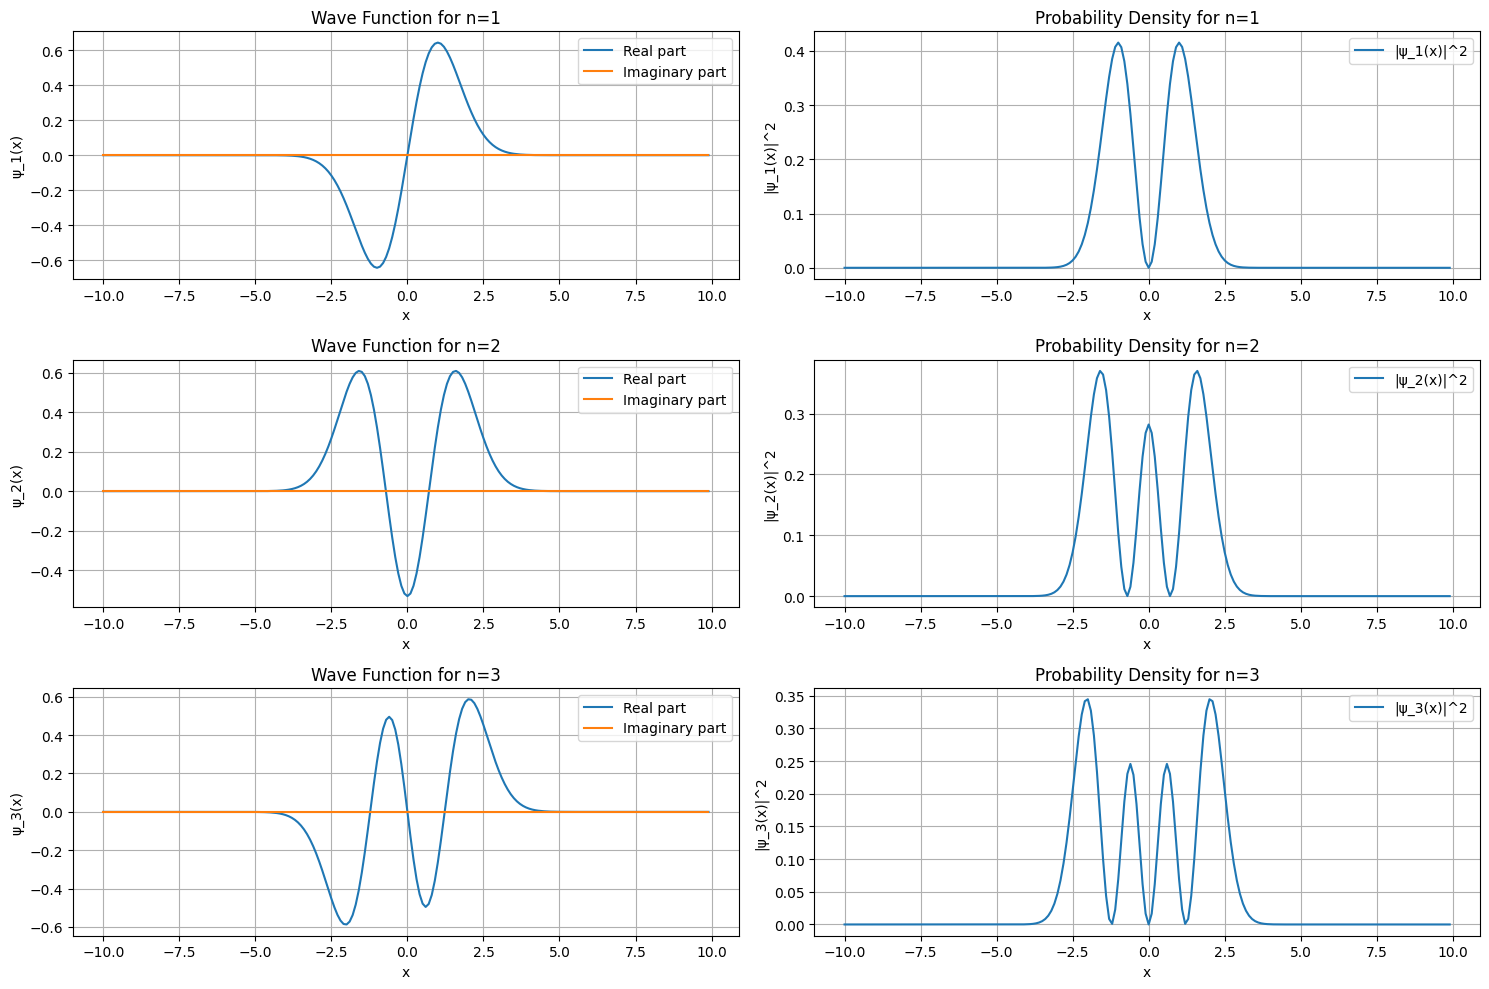

In [6]:
# Estados quânticos para os quais iremos calcular e plotar as funções de onda
states = [1, 2, 3]

# Configura o gráfico
plt.figure(figsize=(15, 10))

for i, n in enumerate(states):
    # Calcula a função de onda
    psi = psi_n_x(n, x)
    # Calcula a densidade de probabilidade como o quadrado do módulo da função de onda
    prob = numpy.conjugate(psi) * psi
    # Calcula a energia do estado
    energy = energy_n(n)
    
    # Imprime a energia associada ao estado
    print(f"Energy of state n={n}: {energy} ħω")
    
# Plotagem da função de onda
plt.subplot(len(states), 2, 2*i + 1)  # Cria um subplot na posição 2*i + 1 em uma grade de len(states) linhas e 2 colunas
plt.plot(x, psi.real, label='Real part')  # Plota a parte real da função de onda ψ_n(x)
plt.plot(x, psi.imag, label='Imaginary part')  # Plota a parte imaginária da função de onda ψ_n(x)
plt.xlabel('x')  # Adiciona rótulo ao eixo x
plt.ylabel(f'ψ_{n}(x)')  # Adiciona rótulo ao eixo y, indicando que é a função de onda para o estado n
plt.legend()  # Adiciona legenda ao gráfico para identificar as partes real e imaginária
plt.title(f'Wave Function for n={n}')  # Adiciona título ao gráfico indicando o estado n
plt.grid(True)  # Adiciona uma grade ao gráfico para melhor visualização

# Plotagem da densidade de probabilidade
plt.subplot(len(states), 2, 2*i + 2)  # Cria um subplot na posição 2*i + 2 em uma grade de len(states) linhas e 2 colunas
plt.plot(x, prob, label=f'|ψ_{n}(x)|^2')  # Plota a densidade de probabilidade |ψ_n(x)|^2
plt.xlabel('x')  # Adiciona rótulo ao eixo x
plt.ylabel(f'|ψ_{n}(x)|^2')  # Adiciona rótulo ao eixo y, indicando que é a densidade de probabilidade para o estado n
plt.legend()  # Adiciona legenda ao gráfico para identificar a densidade de probabilidade
plt.title(f'Probability Density for n={n}')  # Adiciona título ao gráfico indicando o estado n
plt.grid(True)  # Adiciona uma grade ao gráfico para melhor visualização

# Exibe o gráfico
plt.tight_layout()  # Ajusta automaticamente os subplots para que se encaixem na figura de forma ordenada
plt.show()  # Exibe todos os gráficos
